## Comprehensive Data Exploration with Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')

In [27]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### [종속변수 SalePrice 분석]
SalePrice: 집값!

In [28]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

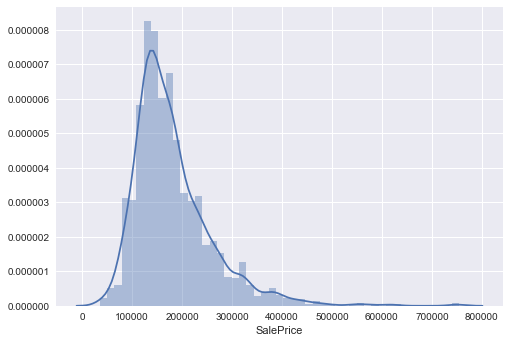

In [29]:
sns.distplot(df_train['SalePrice'])

In [30]:
print("Skewness: {}".format(df_train['SalePrice'].skew()))
print("Kurtosis: {}".format(df_train['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


### [독립변수 선정 및 관계 분석]
주어진 변수에 대한 설명을 읽고 SalePrice와 연관이 깊을 것 같은 변수 몇 개를 뽑아본다.

#### Important variables we will use
1. OverallQual: 집 건축시 쓰인 자재들과 마감의 퀄리티, categorical variable
2. YearBuilt: 다 지어진 년도, 시간 순서가 가장 중요하긴 하지만 categorical로 볼 수도 있겠다고 생각했다.
3. TotalBsmtSF: 지하 면적, continuous variable, 우리나라 대부분의 주거방식이 아파트라 지하를 주차장 이외엔 잘 쓰지 않기 때문에 그냥 변수만 보았을 땐 중요하지 않을 것이라고 생각했는데 이 커널을 만든 사람은 처음부터 중요한 변수로 생각해서 조금 놀라웠다.
4. GrLivArea: 지상 면적, continuous variable


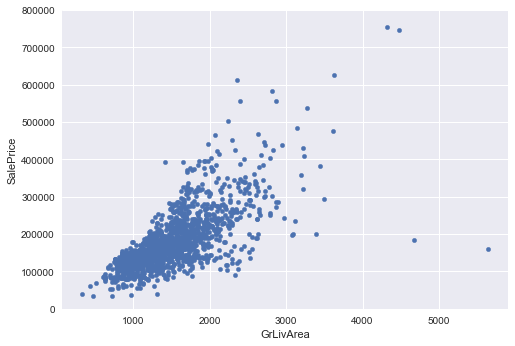

In [31]:
#GrLivArea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

GrLivArea & SalePrice 두 변수 사이에 어느 정도의 linear relationship이 있는 것을 확인할 수 있다.

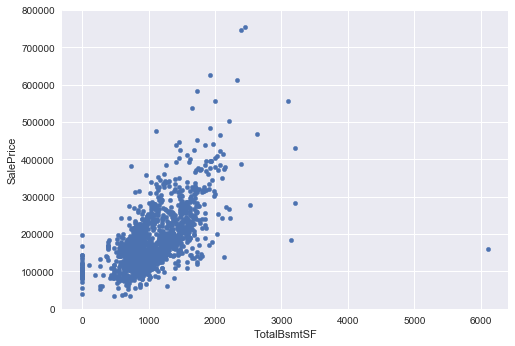

In [32]:
#TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

strong linear reaction between TotalBsmtSF & SalePrice  --> 지수함수같이 보이기도 함

(-0.5, 9.5, 0, 800000)

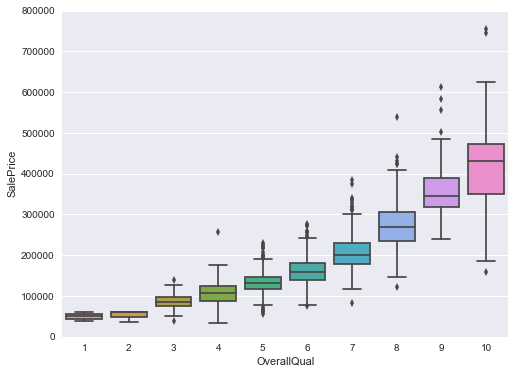

In [33]:
#OverallQual
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

역시나 strong relationship. 퀄리티가 높아질수록 가격도 오르기 때문이다.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

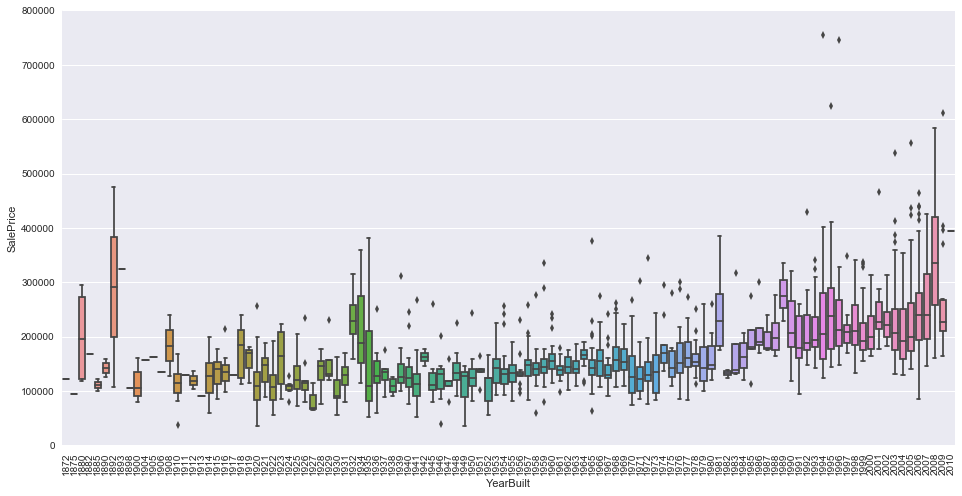

In [34]:
#YearBuilt
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

딱히 연관성이 있어 보이지 않는다. 오히려 YearBuilt보다 OverallQual이 더 높은 상관관계를 가진다. 

즉, 집이 지어진 년도보다 집을 구성하는 재료와 마감 정도가 가격에 더 큰 영향을 미친다는 것을 알 수 있다.

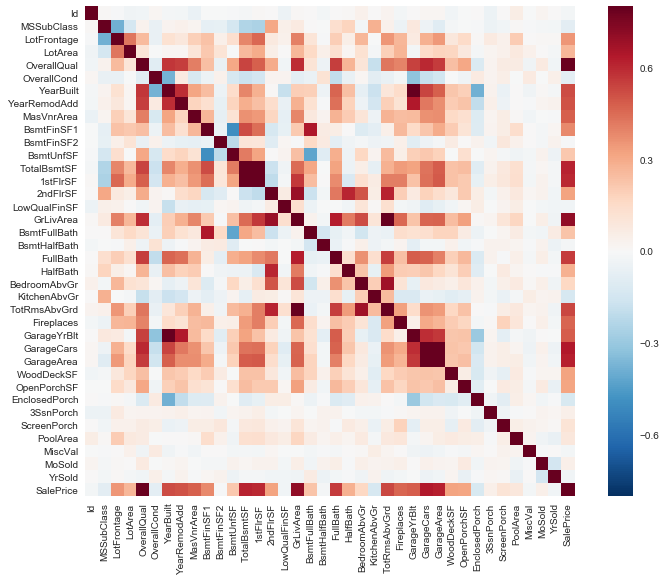

In [35]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

상관관계가 높을수록 색이 진하다.

TotalBstmSF와 1stFlrSF는 상관관계가 매우 높다. --> multicollinearity(다중공선성)를 의심해볼 수 있다. 
(지하 면적과 1층 면적은 당연히 상관관계가 클 수 밖에 없다!)

Garage~로 시작하는 변수들 역시 서로의 상관관계가 높음을 확인할 수 있다. 이름대로 모두 차고와 관련한 변수들이다. 차고의 위치, 지어진 년도, 마감 여부, 크기, 퀄리티, 상태, 몇 대의 차가 들어가는지

우리가 이미 중요하다고 체크한 4가지의 변수는 역시 히트맵에서도 SalePrice와 높은 관련을 가지고 있는 것을 알 수 있다.

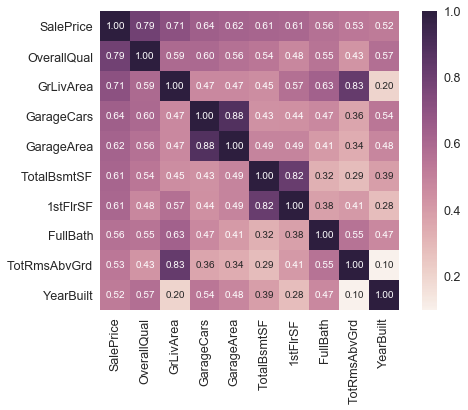

In [36]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

SalePrice와 상관관계가 높은 10개만 가지고 히트맵을 그리고 그 수치를 나타낸 그래프이다.

앞에서 그린 히트맵과 비슷한 결론을 얻을 수 있다. 확인 차원!

개인적으로 히트맵에 수치까지 적은 그래프는 처음 봐서 seaborn 라이브러리를 공부해서 써보는 것도 좋을 것이란 생각이 들었다 ㅎㅅㅎ

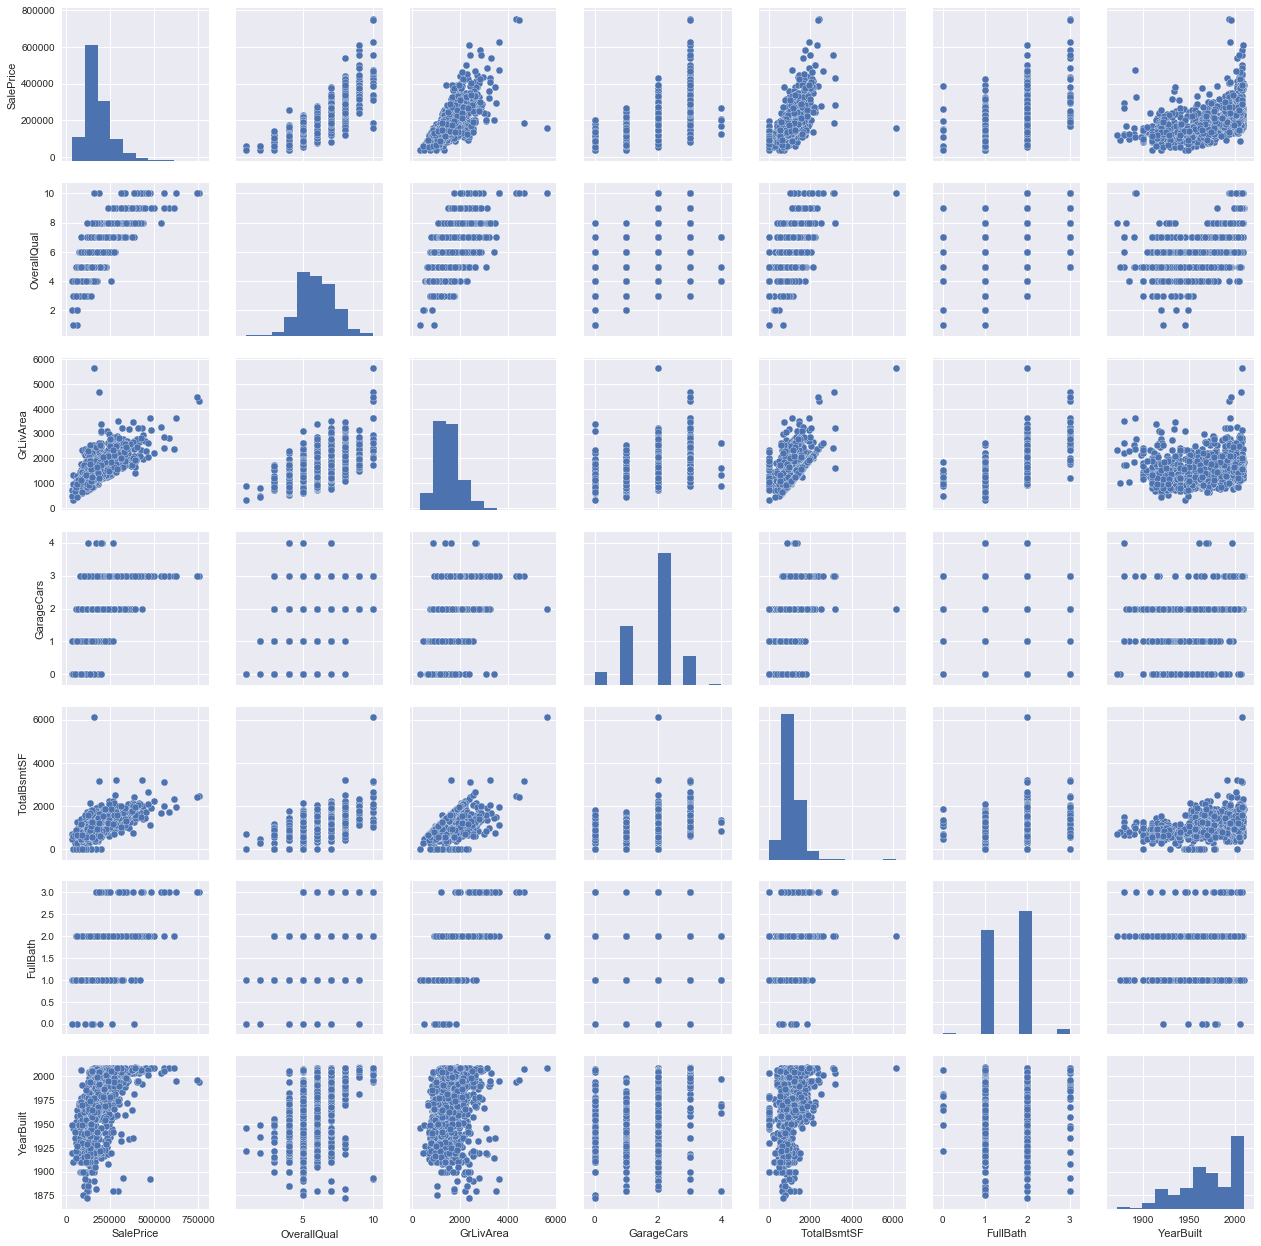

In [37]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show()

### [NA값 처리하기]

In [38]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


PoolQC, MiscFeature, Alley는 NA가 너무 많음! -> 아예 지워버려도 상관 없음

Garage~로 시작하는 변수들은 모두 NA값을 같은 개수로 가지고 있다. 이는 같은 상황 때문에 생겼을 가능성이 크다. 여기서 다중 공선성을 한번 더 확인할 수 있음. ----> 이렇게 NA값의 갯수로 비슷한 변수를 걸러낼 수 있다는 것이 새롭다!

Bsmt~도 Garage~와 같은 케이스라고 할 수 있음.

여기서는 Electrical 변수 외에 NA를 가지는 모든 변수를 제거했고, Electrical 변수는 NA를 가지는 값 1개만 지웠다.

In [39]:
df_train = df_train.drop((missing_data[missing_data['Total']>1]).index, 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

### [Outlier 처리하기]
Outlier를 효과적으로 처리하기 위해서는 변수를 정규화시켜서 임계점을 찾아야 한다고 한다.

변수에 담긴 값들을 정규화시키기 때문에 0이 중심이 된다.

01) Univariate analysis -> 변수 SalePrice

In [3]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution')
print(low_range)
print('outer range (high) of the distribution')
print(high_range)

outer range (low) of the distribution
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]
outer range (high) of the distribution
[[ 3.82897043]
 [ 4.04098249]
 [ 4.49634819]
 [ 4.71041276]
 [ 4.73032076]
 [ 5.06214602]
 [ 5.42383959]
 [ 5.59185509]
 [ 7.10289909]
 [ 7.22881942]]


위의 값들은 SalePrice 변수를 정규화 시킨 다음 양쪽 맨 끝의 10개씩을 보여준 자료들이다.

low range는 0과 멀리 떨어져 있지 않고, high range는 비교적 0과 멀리 떨어져 있다.

여기서는 이 변수에서는 그냥 outlier를 고려하지 않겠다고 이야기 했는데 그 정확한 이유는 명확히 알지 못하겠다. 그저 종속변수여서 그렇게 생각한 것일까하고 유추해 볼 뿐이다ㅠ

02) Bivariate Analysis

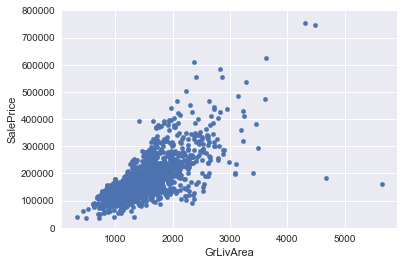

In [4]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [5]:
df_train.sort_values(by='GrLivArea', ascending=False)[:2]
df_train = df_train.drop(df_train[df_train['Id']==1299].index)
df_train = df_train.drop(df_train[df_train['Id']==524].index)

맨 오른쪽에 멀리 떨어진 두개(GrLivArea가 4000 이상인 것)는 농촌에 위치하여 너무나도 넓은 것으로 생각하고 제외한다.

맨 위에 두개(SalePrice가 700000 이상인 것)는 outlier처럼 보이지만 trend를 따르므로 유지 ---> 아까 high range에서 빼지 않은 이유가 나와있었다!...거리는 멀리 떨어져 있기는 하지만 trend 유지라는 이유로 outlier 판별에서 제외될 수 있다는 점이 새로웠다

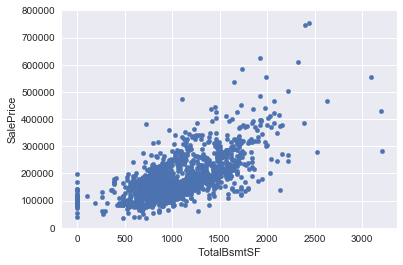

In [6]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

여기서도 TotalBsmtSF가 3000 이상인 점들을 outlier로 분류할법 한데 그렇지 않았다... ' I suppose it's not worth it. We can live with that.'이라는 이유에서 그런 것인데...

사실 아까 GrLivArea에서 4000 이상인 것을 제외한만큼 이것도 충분히 제외할 수 있을 것이라고 생각했는데 의외이다.

### [Variable transformation]
variable transformation을 위해 만족시켜야 할 조건!
1. Normality: 정규성
2. Homoscedasticity: 등분산성
3. Linearity: 선형성
4. Absence of correlated errors: 연관성 있는 에러 제거

내가 지금까지 들었던 전공 중에 가장 끔찍했던 김철응 교수님의 <통계방법론> 수업에서 문제를 풀고 레포트를 썼을 때 매번 했던 과정과 비슷해서 살짝 놀라웠다. 그 때 고생했던게 다 의미 없는건 아니었다는 생각이 들었다....ㅎ

01) Normality

Use histogram & normal probablility plot

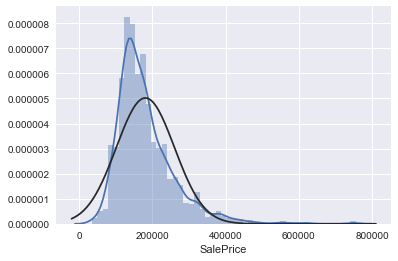

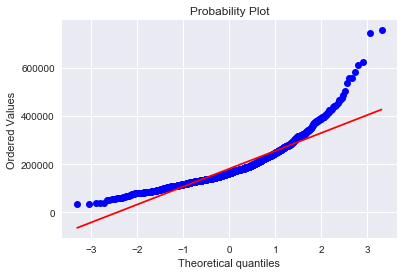

In [10]:
#SalePrice
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

정규성을 만족하지 않는다 -> log transformation을 사용해본다.

In [11]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

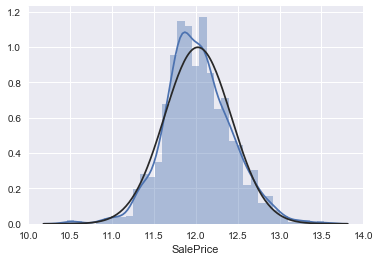

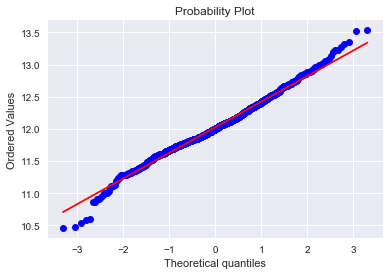

In [12]:
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

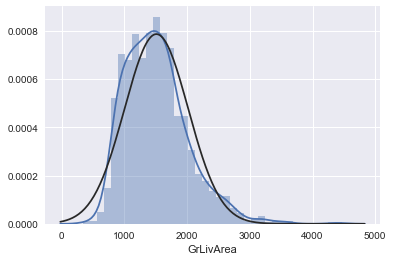

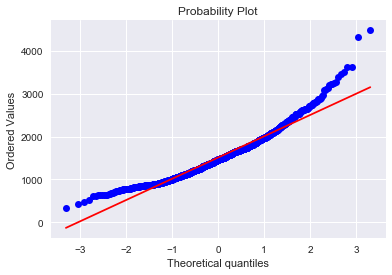

In [13]:
#GrLivArea
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

이 변수도 정규성을 만족하지 않고 역시 log 변환을 해준다.

In [14]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

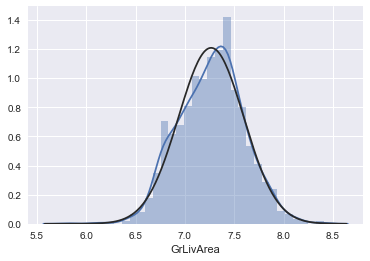

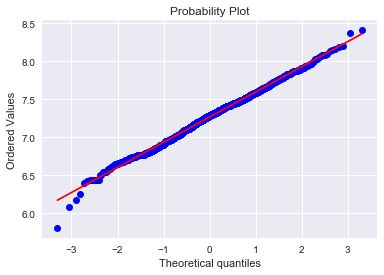

In [15]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

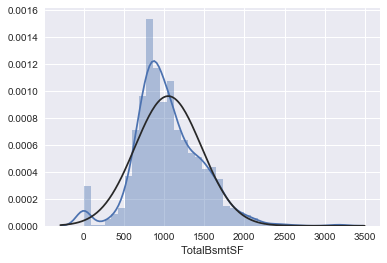

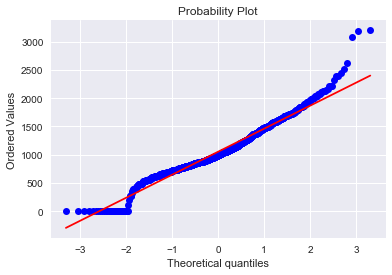

In [16]:
#TotalBsmtSF
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

역시 정규성을 만족하지 않지만 위의 변수들과 똑같이 바로 로그 변환을 하기엔 무리가 있다. 0인 값이 너무 많은데 이 값들은 로그 취하기에 적절하지 않기 때문이다.

0인 것은 로그를 취하지 않고 그대로 두고, 0 아닌 것만 로그를 취한다.

In [17]:
#새 변수 HasBsmt -> binary (0인지 아닌지)
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [18]:
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

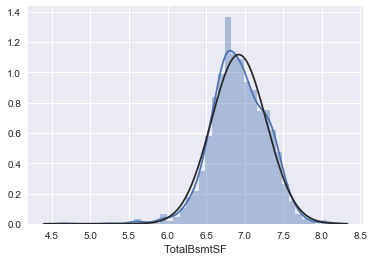

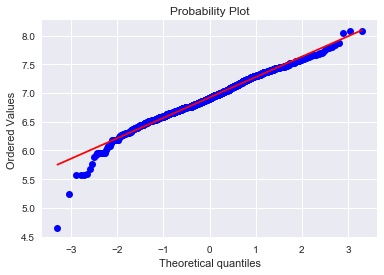

In [19]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

02) Homoscedasticity

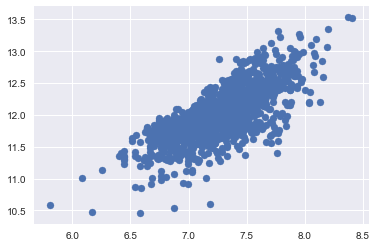

In [20]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

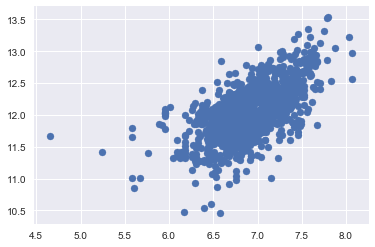

In [21]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice'])

등분산성 검정을 산점도만 가지고 어떻게 하는건지 이해가 잘 되지 않는다......ㅠㅠㅠ

### [더미 변수 만들기]

In [22]:
df_train = pd.get_dummies(df_train)